# Classificação de Imagem

Para a classificação da imagem, utilizamos um modelo pré-trinado do site <a href="https://huggingface.co/">Hugging Face</a>, esse modelo é da OpenAI e pode ser encontrado <a href="https://huggingface.co/openai/clip-vit-large-patch14">aqui.</a>

Basicamente o modelo consiste na criação de tags de classificação e a IA classifica a imagem com base nas tags, iremos utilizar três tags para esse exemplo, sendo elas pet, people e pet and people.

Para melhor organização, dividimos em quatro partes, uma para importar as bibliotecas necessárias e instanciar o modelo, uma para criar uma função para a apresentação da imagem e a classificação retornada pelo modelo, uma para criar uma função para utilização do modelo, e por fim, uma seção para testar o modelo.

In [1]:
# inportando as bibliotecas necessária para o Modelo e manipulação de imagem 
from PIL import Image
import matplotlib.pyplot as plt
import requests

from transformers import CLIPProcessor, CLIPModel

# instanciando o modelo
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

C:\Users\aliss\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [2]:
def apresenta_classifica_precissao(image, probs):
    
    tags = ["Pet", "People", "Pet and People"]
    probs_simple = [probs[0][0].item(), probs[0][1].item(), probs[0][2].item()]
    
    tag =tags[probs_simple.index(max(probs_simple))]
    
    # exiba a imagem
    plt.imshow(image)
    plt.title(tag)
    plt.axis('off')  # desativar os eixos
    plt.show()

    print(f"Pet: {probs_simple[0]}")
    print(f"People: {probs_simple[1]}")
    print(f"Pet and People: {probs_simple[2]}")
    
    return tag, probs_simple

In [3]:
def classifica_imagem(url):
    image = Image.open(url)

    # classes para classificação
    classes = ["a photo of a pet", "a photo of a people", "a photo of a pet and people"]

    inputs = processor(text=classes, images=image, return_tensors="pt", padding=True)

    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
    
    return apresenta_classifica_precissao(image, probs)

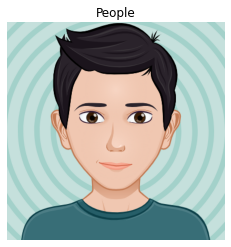

Pet: 0.05142483115196228
People: 0.9119095206260681
Pet and People: 0.03666572645306587


('People', [0.05142483115196228, 0.9119095206260681, 0.03666572645306587])

In [4]:
# teste 1
classifica_imagem("C:/Users/aliss/Downloads/xavatario.png")

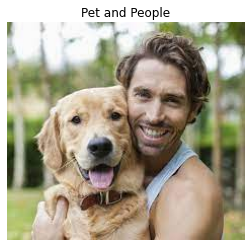

Pet: 0.1045103594660759
People: 0.005005658604204655
Pet and People: 0.8904840350151062


('Pet and People',
 [0.1045103594660759, 0.005005658604204655, 0.8904840350151062])

In [5]:
# teste 2
classifica_imagem("C:/Users/aliss/Downloads/pet_and_people.jpg")

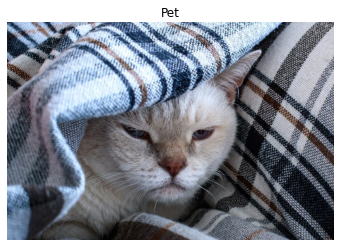

Pet: 0.9612120389938354
People: 0.007041886914521456
Pet and People: 0.03174609690904617


('Pet', [0.9612120389938354, 0.007041886914521456, 0.03174609690904617])

In [6]:
# teste 3
classifica_imagem("C:/Users/aliss/Downloads/gato.jpg")